In [64]:
# Cargamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
# Importamos el Data Set

carros = pd.read_csv("../archivos_CSV/Evaluacion_Carros.csv", header = None)

In [20]:
# Verificamos que se carguen bien los datos y su dimensión

print(carros.shape)
carros.head()

(1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
# Ponemos los encabezados del data Frame

nombre_columnas = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
carros.columns = nombre_columnas

In [22]:
# Observamos los tipos de datos del data frame

carros.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [23]:
# Convertimos los valores de objeto a numéricos

import category_encoders as ce

In [24]:
# Convertimos los valores de objeto a numéricos

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
carros = encoder.fit_transform(carros)

In [25]:
# Observamos la variable objetivo, la cual es Class, y nos dice la calidad del auto. 
# Hacemos un count value para ver como se divide

carros["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [26]:
# Observamos los valores nulos de la Data

carros.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [27]:
# Separamos el conjunto de datos del entrenamiento y la varaible objetivo

X = carros.drop(["class"], axis = 1)
y = carros["class"]

In [37]:
from sklearn.model_selection import train_test_split

In [29]:
# Separamos el modelo en entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
# Entrenamiento del modelo 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [32]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [33]:
# Calculamos las métricas

from sklearn.metrics import accuracy_score

In [45]:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("La precisión en train es ", train_accuracy_tree)
print("La precisión en el testeo es de", test_accuracy_tree)

La precisión en train es  0.771712158808933
La precisión en el testeo es de 0.791907514450867


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 2, random_state = 0)

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [52]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [53]:
# Calculamos el accuracy del train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Calculamos el accuracy del test 
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("El accuracy en train es: ", train_accuracy_rf)
print("El accuracy en test es: ", test_accuracy_rf)

El accuracy en train es:  0.9693961952026469
El accuracy en test es:  0.9075144508670521


In [54]:
# Visualización de los features importances

features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

In [56]:
features_scores

safety      0.339138
persons     0.235363
buying      0.182355
maint       0.110552
lug_boot    0.080875
doors       0.051717
dtype: float64

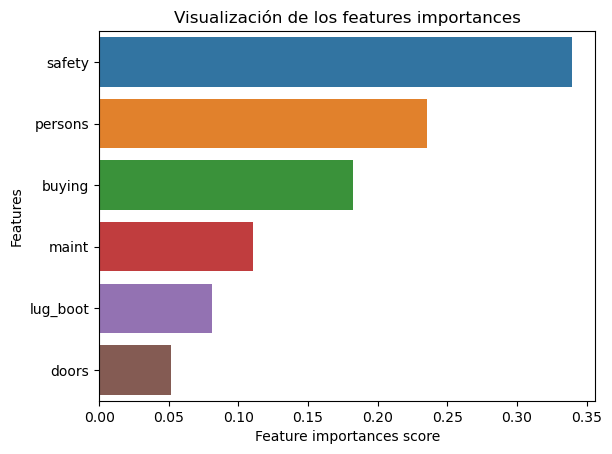

In [58]:
# Graficamos las variables más importantes

sns.barplot(x = features_scores, y = features_scores.index)
plt.xlabel("Feature importances score")
plt.ylabel("Features")
plt.title("Visualización de los features importances")
plt.show()

In [60]:
# Vemos la matriz de confusión

cm = confusion_matrix(y_test, y_test_pred_rf)



In [62]:
# Vemos otras métricas

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.77      0.90      0.83       118
        good       0.50      0.47      0.49        19
       unacc       0.99      0.94      0.96       358
       vgood       0.88      0.88      0.88        24

    accuracy                           0.91       519
   macro avg       0.78      0.80      0.79       519
weighted avg       0.91      0.91      0.91       519

